In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')

## Imports & setup

In [2]:
import pathlib
import datetime
from os import PathLike
from typing import Union

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import palettable
import seaborn as sns
%matplotlib inline

PROJECT_DIR = pathlib.Path.cwd().parent.resolve()
CLEAN_DATA_DIR = PROJECT_DIR / 'data' / '05-clean'

plt.style.use('grayscale')
# Custom Overrides to grayscale
params = {'legend.fontsize': 'x-large',
          'lines.linewidth': 0.75,
      'figure.figsize': (15, 7),
          'grid.color': 'white',
          'axes.axisbelow': False,
          'axes.grid': True,
          'axes.grid.axis': 'y',
     'axes.labelsize': 'x-large',
     'axes.titlesize':'xx-large',
     'xtick.labelsize':'x-large',
     'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
figsize=(15,7)

In [3]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import sklearn

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load Data

In [5]:
df_files = pd.read_csv("/content/Weather.csv")

daymapper = {0.0: 'Mon', 1.0: 'Tue', 2.0: 'Wed', 3.0: 'Thu', 4.0: 'Fri', 5.0: 'Sat', 6.0: 'Sun'}
weekdaymapper = {0.0: 'Weekday', 1.0: 'Weekday', 2.0: 'Weekday', 3.0: 'Weekday', 4.0: 'Weekday',
                 5.0: 'Weekend', 6.0: 'Weekend'}
df_files['dayofweek'] = df_files['Day_Of_Week'].map(daymapper)
df_files['daytype'] = df_files['Day_Of_Week'].map(weekdaymapper)
df_files['Date'] = df_files['Date'].str.replace(' 00:00:00', '')

In [6]:
df_files.head()

,Date,Time,Year,Quarter,Month,Week_Of_Year,Day_of_Year,Day_Of_Week,Stat_Hol,Hour_of_Day,Relative Humidity,Wind Speed,Visibility,Pressure,Wind_Chill,Dewpoint Temp,Temperature,dayofweek,daytype
0,2010-01-01,00:00:00,2010,1,1,53,1,4,1,0,76.0,26.0,25.0,99.26,-18.0,-12.7,-9.3,Fri,Weekday
1,2010-01-01,01:00:00,2010,1,1,53,1,4,1,1,76.0,26.0,25.0,99.26,-18.0,-12.8,-9.3,Fri,Weekday
2,2010-01-01,02:00:00,2010,1,1,53,1,4,1,2,74.0,26.0,25.0,99.29,-18.0,-13.4,-9.6,Fri,Weekday
3,2010-01-01,03:00:00,2010,1,1,53,1,4,1,3,72.0,22.0,25.0,99.35,-18.0,-13.9,-9.8,Fri,Weekday
4,2010-01-01,04:00:00,2010,1,1,53,1,4,1,4,74.0,32.0,24.1,99.42,-19.0,-13.5,-9.7,Fri,Weekday


In [7]:
df_files.tail()

,Date,Time,Year,Quarter,Month,Week_Of_Year,Day_of_Year,Day_Of_Week,Stat_Hol,Hour_of_Day,Relative Humidity,Wind Speed,Visibility,Pressure,Wind_Chill,Dewpoint Temp,Temperature,dayofweek,daytype
96427,2020-12-31,19:00:00,2020,4,12,53,365,3,0,19,94.0,9.0,16.1,99.21,-11.702041,0.8,1.6,Thu,Weekday
96428,2020-12-31,20:00:00,2020,4,12,53,365,3,0,20,95.0,9.0,11.3,99.21,-11.702041,0.4,1.1,Thu,Weekday
96429,2020-12-31,21:00:00,2020,4,12,53,365,3,0,21,97.0,7.0,9.7,99.20,-11.702041,0.6,1.0,Thu,Weekday
96430,2020-12-31,22:00:00,2020,4,12,53,365,3,0,22,97.0,7.0,9.7,99.20,-11.702041,0.5,0.9,Thu,Weekday
96431,2020-12-31,23:00:00,2020,4,12,53,365,3,0,23,96.0,7.0,8.0,99.19,-11.702041,0.1,0.6,Thu,Weekday


In [8]:
df_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               96432 non-null  object 
 1   Time               96432 non-null  object 
 2   Year               96432 non-null  int64  
 3   Quarter            96432 non-null  int64  
 4   Month              96432 non-null  int64  
 5   Week_Of_Year       96432 non-null  int64  
 6   Day_of_Year        96432 non-null  int64  
 7   Day_Of_Week        96432 non-null  int64  
 8   Stat_Hol           96432 non-null  int64  
 9   Hour_of_Day        96432 non-null  int64  
 10  Relative Humidity  96432 non-null  float64
 11  Wind Speed         96432 non-null  float64
 12  Visibility         96432 non-null  float64
 13  Pressure           96432 non-null  float64
 14  Wind_Chill         96432 non-null  float64
 15  Dewpoint Temp      96432 non-null  float64
 16  Temperature        964

In [9]:
for col in df_files.columns:
    print(col)

Date
Time
Year
Quarter
Month
Week_Of_Year
Day_of_Year
Day_Of_Week
Stat_Hol
Hour_of_Day
Relative Humidity
Wind Speed
Visibility
Pressure
Wind_Chill
Dewpoint Temp
Temperature
dayofweek
daytype


In [10]:
df_files['Year'].value_counts()

2011    8784
2015    8784
2019    8784
2010    8760
2012    8760
2013    8760
2014    8760
2016    8760
2017    8760
2018    8760
2020    8760
Name: Year, dtype: int64

### Data for Every Hour in 2010-2019

In [11]:
pd.set_option('display.max_columns', 100)


# Convert the 'Date' column to datetime type
df_files['Date'] = pd.to_datetime(df_files['Date'], dayfirst=True, errors='coerce')

# Find the index of the row with the invalid date
invalid_date_index = df_files[df_files['Date'].isnull()].index

# Remove the row with the invalid date
df_files = df_files.drop(invalid_date_index)

# Filter rows based on the year range
df_filtered = df_files[df_files['Date'].dt.year.between(2010, 2019)]
df_filtered.head()

,Date,Time,Year,Quarter,Month,Week_Of_Year,Day_of_Year,Day_Of_Week,Stat_Hol,Hour_of_Day,Relative Humidity,Wind Speed,Visibility,Pressure,Wind_Chill,Dewpoint Temp,Temperature,dayofweek,daytype
0,2010-01-01,00:00:00,2010,1,1,53,1,4,1,0,76.0,26.0,25.0,99.26,-18.0,-12.7,-9.3,Fri,Weekday
1,2010-01-01,01:00:00,2010,1,1,53,1,4,1,1,76.0,26.0,25.0,99.26,-18.0,-12.8,-9.3,Fri,Weekday
2,2010-01-01,02:00:00,2010,1,1,53,1,4,1,2,74.0,26.0,25.0,99.29,-18.0,-13.4,-9.6,Fri,Weekday
3,2010-01-01,03:00:00,2010,1,1,53,1,4,1,3,72.0,22.0,25.0,99.35,-18.0,-13.9,-9.8,Fri,Weekday
4,2010-01-01,04:00:00,2010,1,1,53,1,4,1,4,74.0,32.0,24.1,99.42,-19.0,-13.5,-9.7,Fri,Weekday


In [12]:
df_filtered.describe() # describes the dataset

,Year,Quarter,Month,Week_Of_Year,Day_of_Year,Day_Of_Week,Stat_Hol,Hour_of_Day,Relative Humidity,Wind Speed,Visibility,Pressure,Wind_Chill,Dewpoint Temp,Temperature
count,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000
mean,2014.500000,2.509589,6.526027,26.566027,183.251507,2.999452,0.027671,11.500000,69.358881,16.059092,20.193524,99.536801,-11.697164,3.260521,9.036228
std,2.872298,1.116773,3.447871,15.061136,105.437916,2.000148,0.164030,6.922226,16.094759,10.031338,6.835965,0.767981,2.863748,10.196431,10.953737
min,2010.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,95.910000,-38.000000,-32.000000,-24.600000
25%,2012.000000,2.000000,4.000000,14.000000,92.000000,1.000000,0.000000,5.750000,58.000000,9.000000,16.100000,99.080000,-11.702041,-4.500000,0.600000
50%,2014.500000,3.000000,7.000000,27.000000,183.000000,3.000000,0.000000,11.500000,71.000000,15.000000,24.100000,99.560000,-11.702041,3.500000,9.100000
75%,2017.000000,4.000000,10.000000,40.000000,275.000000,5.000000,0.000000,17.250000,82.000000,22.000000,24.100000,100.030000,-11.702041,11.800000,18.100000
max,2019.000000,4.000000,12.000000,53.000000,366.000000,6.000000,1.000000,23.000000,100.000000,76.000000,40.200000,102.240000,-1.000000,26.200000,37.200000


In [13]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [14]:
df_filtered.columns

Index(['Date', 'Time', 'Year', 'Quarter', 'Month', 'Week_Of_Year',
       'Day_of_Year', 'Day_Of_Week', 'Stat_Hol', 'Hour_of_Day',
       'Relative Humidity', 'Wind Speed', 'Visibility', 'Pressure',
       'Wind_Chill', 'Dewpoint Temp', 'Temperature', 'dayofweek', 'daytype'],
      dtype='object')

In [15]:
features_train=df_filtered[['Dewpoint Temp', 'Relative Humidity','Wind Speed', 'Visibility', 'Pressure','Hour_of_Day','Month','Day_Of_Week', 'Day_of_Year', 'Week_Of_Year','Quarter','Wind_Chill','Stat_Hol','Temperature']]
features_train
scaler=StandardScaler()
Train=scaler.fit_transform(np.array(features_train))
Train

array([[-1.56531362,  0.41262852,  0.99099088, ..., -2.20091749,
         5.92778322, -1.67397963],
       [-1.57512103,  0.41262852,  0.99099088, ..., -2.20091749,
         5.92778322, -1.67397963],
       [-1.63396549,  0.28836375,  0.99099088, ..., -2.20091749,
         5.92778322, -1.7013677 ],
       ...,
       [-2.16356561, -0.45722481,  0.39286186, ..., -3.5976966 ,
        -0.16869713, -2.01176581],
       [-2.16356561, -0.39509243,  0.5922382 , ..., -3.5976966 ,
        -0.16869713, -2.03002452],
       [-2.10472115, -0.27082767,  0.79161454, ..., -3.94689137,
        -0.16869713, -2.02089517]])

In [16]:
cmatrix = features_train.corr()
round(cmatrix, ndigits=5)

,Dewpoint Temp,Relative Humidity,Wind Speed,Visibility,Pressure,Hour_of_Day,Month,Day_Of_Week,Day_of_Year,Week_Of_Year,Quarter,Wind_Chill,Stat_Hol,Temperature
Dewpoint Temp,1.00000,0.13485,-0.19327,-0.12930,-0.24242,0.01532,0.31969,-0.01414,0.31631,0.31634,0.32643,0.20617,0.00207,0.93435
Relative Humidity,0.13485,1.00000,-0.20202,-0.54829,-0.27405,-0.25127,0.11573,-0.00828,0.11648,0.11987,0.11419,0.06266,0.01407,-0.22094
Wind Speed,-0.19327,-0.20202,1.00000,0.11452,-0.28424,0.13566,-0.06213,0.01027,-0.06432,-0.06995,-0.06248,-0.16382,0.00374,-0.12067
Visibility,-0.12930,-0.54829,0.11452,1.00000,0.25786,0.04622,0.02171,-0.00908,0.02277,0.01937,0.02149,-0.05796,0.00894,0.04850
Pressure,-0.24242,-0.27405,-0.28424,0.25786,1.00000,-0.00692,0.02043,0.01731,0.02229,0.02883,0.01560,-0.05023,0.00796,-0.14695
Hour_of_Day,0.01532,-0.25127,0.13566,0.04622,-0.00692,1.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.01289,0.00000,0.10441
Month,0.31969,0.11573,-0.06213,0.02171,0.02043,-0.00000,1.00000,0.00231,0.99650,0.96926,0.97136,0.10229,0.05274,0.27191
Day_Of_Week,-0.01414,-0.00828,0.01027,-0.00908,0.01731,-0.00000,0.00231,1.00000,0.00222,0.00316,0.00135,0.01269,-0.11853,-0.00980
Day_of_Year,0.31631,0.11648,-0.06432,0.02277,0.02229,-0.00000,0.99650,0.00222,1.00000,0.97061,0.96820,0.09945,0.04717,0.26830
Week_Of_Year,0.31634,0.11987,-0.06995,0.01937,0.02883,-0.00000,0.96926,0.00316,0.97061,1.00000,0.94529,0.09459,0.07295,0.26736


In [21]:
df_files.tail()

,Date,Time,Year,Quarter,Month,Week_Of_Year,Day_of_Year,Day_Of_Week,Stat_Hol,Hour_of_Day,Relative Humidity,Wind Speed,Visibility,Pressure,Wind_Chill,Dewpoint Temp,Temperature,dayofweek,daytype
96427,2020-12-31,19:00:00,2020,4,12,53,365,3,0,19,94.0,9.0,16.1,99.21,-11.702041,0.8,1.6,Thu,Weekday
96428,2020-12-31,20:00:00,2020,4,12,53,365,3,0,20,95.0,9.0,11.3,99.21,-11.702041,0.4,1.1,Thu,Weekday
96429,2020-12-31,21:00:00,2020,4,12,53,365,3,0,21,97.0,7.0,9.7,99.20,-11.702041,0.6,1.0,Thu,Weekday
96430,2020-12-31,22:00:00,2020,4,12,53,365,3,0,22,97.0,7.0,9.7,99.20,-11.702041,0.5,0.9,Thu,Weekday
96431,2020-12-31,23:00:00,2020,4,12,53,365,3,0,23,96.0,7.0,8.0,99.19,-11.702041,0.1,0.6,Thu,Weekday


In [22]:
pd.set_option('display.max_columns', 100)

dftest = df_files[df_files['Date'].dt.year == 2020]
dftest.head()

,Date,Time,Year,Quarter,Month,Week_Of_Year,Day_of_Year,Day_Of_Week,Stat_Hol,Hour_of_Day,Relative Humidity,Wind Speed,Visibility,Pressure,Wind_Chill,Dewpoint Temp,Temperature,dayofweek,daytype
87672,2020-01-01,00:00:00,2020,1,1,1,1,3,1,0,64.0,9.0,24.1,100.47,-19.0,-18.9,-13.6,Thu,Weekday
87673,2020-01-01,01:00:00,2020,1,1,1,1,3,1,1,62.0,9.0,24.1,100.49,-19.0,-19.0,-13.3,Thu,Weekday
87674,2020-01-01,02:00:00,2020,1,1,1,1,3,1,2,64.0,7.0,24.1,100.55,-18.0,-18.5,-13.1,Thu,Weekday
87675,2020-01-01,03:00:00,2020,1,1,1,1,3,1,3,69.0,4.0,24.1,100.58,-16.0,-17.9,-13.5,Thu,Weekday
87676,2020-01-01,04:00:00,2020,1,1,1,1,3,1,4,71.0,6.0,24.1,100.59,-18.0,-17.8,-13.6,Thu,Weekday


In [23]:
features_test = dftest[['Dewpoint Temp', 'Relative Humidity','Wind Speed', 'Visibility', 'Pressure','Hour_of_Day','Month','Day_Of_Week', 'Day_of_Year', 'Week_Of_Year','Quarter','Wind_Chill','Stat_Hol','Temperature']]
Test = scaler.fit_transform(np.array(features_test))
Test

array([[-2.04159275, -0.30011886, -0.6950164 , ..., -2.43803067,
         5.95818764, -2.08961036],
       [-2.05115846, -0.41900738, -0.6950164 , ..., -2.43803067,
         5.95818764, -2.060893  ],
       [-2.0033299 , -0.30011886, -0.89527768, ..., -2.09525134,
         5.95818764, -2.04174808],
       ...,
       [-0.17627883,  1.66154169, -0.89527768, ...,  0.06355888,
        -0.16783627, -0.69203176],
       [-0.18584454,  1.66154169, -0.89527768, ...,  0.06355888,
        -0.16783627, -0.70160422],
       [-0.22410739,  1.60209743, -0.89527768, ...,  0.06355888,
        -0.16783627, -0.73032158]])

In [24]:
print(Train.shape)
print(Train[2:].shape)
x_train = np.array([[Train[i-2], Train[i-1], Train[i]] for i in range(2, len(Train)-24)])
x_test = np.array([[Test[i-2], Test[i-1], Test[i]] for i in range(2, len(Test)-24)])[:500]
print(f'x_train.shape: {x_train.shape} x_test.shape: {x_test.shape}')
y_train = np.array([[Train[i+j+1,-1] for j in range(0, 24)] for i in range(2, len(Train)-24)])
y_test = np.array([[Test[i+j+1,-1] for j in range(0, 24)] for i in range(2, len(Test)-24)])[:500]
print(f'y_train.shape: {y_train.shape} y_test.shape: {y_test.shape}')

(87600, 14)
(87598, 14)
x_train.shape: (87574, 3, 14) x_test.shape: (500, 3, 14)
y_train.shape: (87574, 24) y_test.shape: (500, 24)


#Transformer Model Algorithm

In [ ]:
from random import choice
from random import uniform
from numpy.random import randint
import random

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn import metrics
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)
print(f'x_train.shape: {x_train.shape} x_val.shape: {x_val.shape}')
print(f'y_train.shape: {y_train.shape} y_val.shape: {y_val.shape}')

x_train.shape: (19708, 3, 14) x_val.shape: (6570, 3, 14)
y_train.shape: (19708, 24) y_val.shape: (6570, 24)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, LSTM
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

def Transformer_model(param):
    batch_sz, ep, lr = param

    # Defining the input layer
    inputs = layers.Input(shape=(3, 14))

    # Reshaping the input for compatibility with the Transformer model
    reshaped_inputs = layers.Reshape((42,))(inputs)

    # Adding the Transformer layers
    transformer = layers.Transformer(
        num_heads=8,
        d_model=64,
        d_ff=256,
        dropout=0.1,
        activation="relu",
        kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-5),
        bias_regularizer=tf.keras.regularizers.L2(1e-5),
        activity_regularizer=tf.keras.regularizers.L2(1e-5),
    )(reshaped_inputs)

    # Reshaping the output back to the original shape
    reshaped_transformer = layers.Reshape((3, 64))(transformer)

    # Adding the output layer
    outputs = layers.Dense(24, kernel_initializer='normal', activation='linear')(reshaped_transformer)

    # Creating the model
    model = models.Model(inputs=inputs, outputs=outputs)

    # Defining the optimizer
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.9)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

    # Early stopping
    callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=5, min_delta=0.0001)]

    # Fitting the model to the training set
    model.fit(x_train, y_train, batch_size=batch_sz, epochs=ep, validation_data=(x_val, y_val), callbacks=callbacks, verbose=0)

    return model

In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 10.2 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, LSTM
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

def Transformer_model(param):
    batch_sz, ep, lr = param

    model = models.Sequential()

    # Defining the input layer
    model.add(layers.Dense(units=36, input_shape=(3, 14), kernel_initializer='normal', activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-5), bias_regularizer=tf.keras.regularizers.L2(1e-5), activity_regularizer=tf.keras.regularizers.L2(1e-5)))

    # Adding the Transformer layer
    model.add(layers.TimeDistributed(layers.Dense(64)))

    attn_output = layers.MultiHeadAttention(
        num_heads=8,
        key_dim=64,
        dropout=0.1,
    )(model.output, model.output)
    attn_output = layers.LayerNormalization(epsilon=1e-6)(attn_output)
    merged_output = layers.Concatenate()([model.output, attn_output])

    # Flattening the output
    flattened_output = layers.Flatten()(merged_output)

    # Adding the dense layers
    dense_output = layers.Dense(64, activation='relu')(flattened_output)
    dense_output = layers.Dense(64, activation='relu')(dense_output)

    # Defining the output layer of the model
    output = layers.Dense(24, kernel_initializer='normal', activation='linear')(dense_output)

    model = models.Model(inputs=model.inputs, outputs=output)

    # Defining the optimizer
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.9)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

    # Early stopping
    callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=5, min_delta=0.0001)]

    # Fitting the model to the training set
    model.fit(x_train, y_train, batch_size=batch_sz, epochs=ep, validation_data=(x_val, y_val), callbacks=callbacks, verbose=0)

    return model



In [ ]:
# Fitness evaluation metric: Classification Accuracy
from keras.losses import mean_squared_error as MSE
from keras.losses import MeanAbsoluteError
def fitness_evaluation(model):
  #mean_absolute_percentage_error = tf.keras.losses.MeanAbsolutePercentageError()
  #metrics = kl(y_test, model.predict(x_test)).numpy()
  #metrics = mean_absolute_percentage_error(y_test, model.predict(x_test)).numpy()
  MSE = tf.keras.losses.MeanSquaredError()
  metrics = MSE(y_test, model.predict(x_test)).numpy().mean()
  print(f"metrics:{metrics}")
  return metrics

In [ ]:
param = [16, 500, 0.0025]
model = Transformer_model(param)
print(model)

In [ ]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [ ]:
# Defining the list of hyper parameters to try
batch_sz=[8,12,20,24]
ep= [1000]
lr=[0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]

import pandas as pd
SearchResultsData = pd.DataFrame(columns=['TrialNumber', 'Parameters', "learning_rate", "MAPE"])

# initializing trials
TrialNumber = 0
for batch_size_trial in batch_sz:
  for epochs_trial in ep:
    for learning_rate in lr:
      TrialNumber += 1

      model = Sequential()

      # Defining the input layer
      model.add(layers.Dense(units=36, input_shape=(3, 14), kernel_initializer='normal', activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-5), bias_regularizer=tf.keras.regularizers.L2(1e-5), activity_regularizer=tf.keras.regularizers.L2(1e-5)))

      # Adding the Transformer layer
      model.add(layers.TimeDistributed(layers.Dense(64)))

      attn_output = layers.MultiHeadAttention(
          num_heads=8,
          key_dim=64,
          dropout=0.1,
      )(model.output, model.output)
      attn_output = layers.LayerNormalization(epsilon=1e-6)(attn_output)
      merged_output = layers.Concatenate()([model.output, attn_output])

      # Flattening the output
      flattened_output = layers.Flatten()(merged_output)

      # Adding the dense layers
      dense_output = layers.Dense(64, activation='relu')(flattened_output)
      dense_output = layers.Dense(64, activation='relu')(dense_output)

      # Defining the output layer of the model
      output = layers.Dense(24, kernel_initializer='normal', activation='linear')(dense_output)

      model = models.Model(inputs=model.inputs, outputs=output)

      # Defining the optimizer
      lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.9)
      optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

      # Compiling the model
      model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

      # Early stopping
      callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=5, min_delta=0.0001)]

      # Fitting the model to the training set
      model.fit(x_train, y_train, batch_size=batch_size_trial, epochs=epochs_trial, validation_data=(x_val, y_val), callbacks=callbacks, verbose=0)
      y_pred_train = model.predict(x_train)
      MAPE = mean_absolute_percentage_error(y_train, y_pred_train)

      # printing the results of the current iteration
      print(TrialNumber, 'Parameters:', 'batch_size:', batch_size_trial, '-', 'epochs:', epochs_trial, "lr:", learning_rate, "MAPE:", MAPE)
      SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))

SearchResultsData.to_csv("Results.csv")

616/616 [==============================] - 4s 6ms/step
1 Parameters: batch_size: 8 - epochs: 1000 lr: 0.5 MAPE: 3.5869224639983526


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 4s 7ms/step
2 Parameters: batch_size: 8 - epochs: 1000 lr: 0.1 MAPE: 1.1186573726468043


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 3s 5ms/step
3 Parameters: batch_size: 8 - epochs: 1000 lr: 0.05 MAPE: 1.115934211131299


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 3s 5ms/step
4 Parameters: batch_size: 8 - epochs: 1000 lr: 0.01 MAPE: 3.2093426392165285


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 3s 5ms/step
5 Parameters: batch_size: 8 - epochs: 1000 lr: 0.005 MAPE: 2.129815166598609


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 4s 7ms/step
6 Parameters: batch_size: 8 - epochs: 1000 lr: 0.001 MAPE: 1.8668401920982127


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 4s 6ms/step
7 Parameters: batch_size: 8 - epochs: 1000 lr: 0.0005 MAPE: 2.2892082104249156


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 3s 5ms/step
8 Parameters: batch_size: 8 - epochs: 1000 lr: 0.0001 MAPE: 1.828989449232056


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 3s 5ms/step
9 Parameters: batch_size: 12 - epochs: 1000 lr: 0.5 MAPE: 1.7366274855175206


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 4s 6ms/step
10 Parameters: batch_size: 12 - epochs: 1000 lr: 0.1 MAPE: 1.7807216205019263


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 3s 5ms/step
11 Parameters: batch_size: 12 - epochs: 1000 lr: 0.05 MAPE: 2.0470136741630505


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 4s 6ms/step
12 Parameters: batch_size: 12 - epochs: 1000 lr: 0.01 MAPE: 1.2869521066526328


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 4s 6ms/step
13 Parameters: batch_size: 12 - epochs: 1000 lr: 0.005 MAPE: 1.7143839096257698


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 3s 5ms/step
14 Parameters: batch_size: 12 - epochs: 1000 lr: 0.001 MAPE: 1.6709406057649892


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 4s 6ms/step
15 Parameters: batch_size: 12 - epochs: 1000 lr: 0.0005 MAPE: 1.6782496747686146


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 4s 6ms/step
16 Parameters: batch_size: 12 - epochs: 1000 lr: 0.0001 MAPE: 1.7079671799003588


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 4s 7ms/step
17 Parameters: batch_size: 20 - epochs: 1000 lr: 0.5 MAPE: 1.5114588323188645


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 3s 5ms/step
18 Parameters: batch_size: 20 - epochs: 1000 lr: 0.1 MAPE: 1.5085176345283464


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 3s 5ms/step
19 Parameters: batch_size: 20 - epochs: 1000 lr: 0.05 MAPE: 1.831100239247557


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 4s 6ms/step
20 Parameters: batch_size: 20 - epochs: 1000 lr: 0.01 MAPE: 1.9724525424720938


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 3s 5ms/step
21 Parameters: batch_size: 20 - epochs: 1000 lr: 0.005 MAPE: 1.8508577803661623


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 5s 6ms/step
22 Parameters: batch_size: 20 - epochs: 1000 lr: 0.001 MAPE: 1.088717216632391


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 3s 5ms/step
23 Parameters: batch_size: 20 - epochs: 1000 lr: 0.0005 MAPE: 1.8056227076413425


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 3s 5ms/step
24 Parameters: batch_size: 20 - epochs: 1000 lr: 0.0001 MAPE: 1.4444305048057011


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 3s 5ms/step
25 Parameters: batch_size: 24 - epochs: 1000 lr: 0.5 MAPE: 3.8958342948775146


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 3s 5ms/step
26 Parameters: batch_size: 24 - epochs: 1000 lr: 0.1 MAPE: 1.8402978247774182


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 4s 6ms/step
27 Parameters: batch_size: 24 - epochs: 1000 lr: 0.05 MAPE: 1.5778998168249785


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 3s 5ms/step
28 Parameters: batch_size: 24 - epochs: 1000 lr: 0.01 MAPE: 1.8289966643224183


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 3s 5ms/step
29 Parameters: batch_size: 24 - epochs: 1000 lr: 0.005 MAPE: 1.7649963032591895


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 4s 6ms/step
30 Parameters: batch_size: 24 - epochs: 1000 lr: 0.001 MAPE: 1.409239538989498


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 3s 5ms/step
31 Parameters: batch_size: 24 - epochs: 1000 lr: 0.0005 MAPE: 1.3943503941018396


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


616/616 [==============================] - 3s 5ms/step
32 Parameters: batch_size: 24 - epochs: 1000 lr: 0.0001 MAPE: 1.4338556737609103


<ipython-input-65-acda0bf52d88>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial) + "-" + str(learning_rate), MAPE]], columns=['TrialNumber', 'Parameters', "MAPE"]))


In [ ]:
y_test[:, 1].shape

(500,)

16/16 [==============================] - 0s 5ms/step


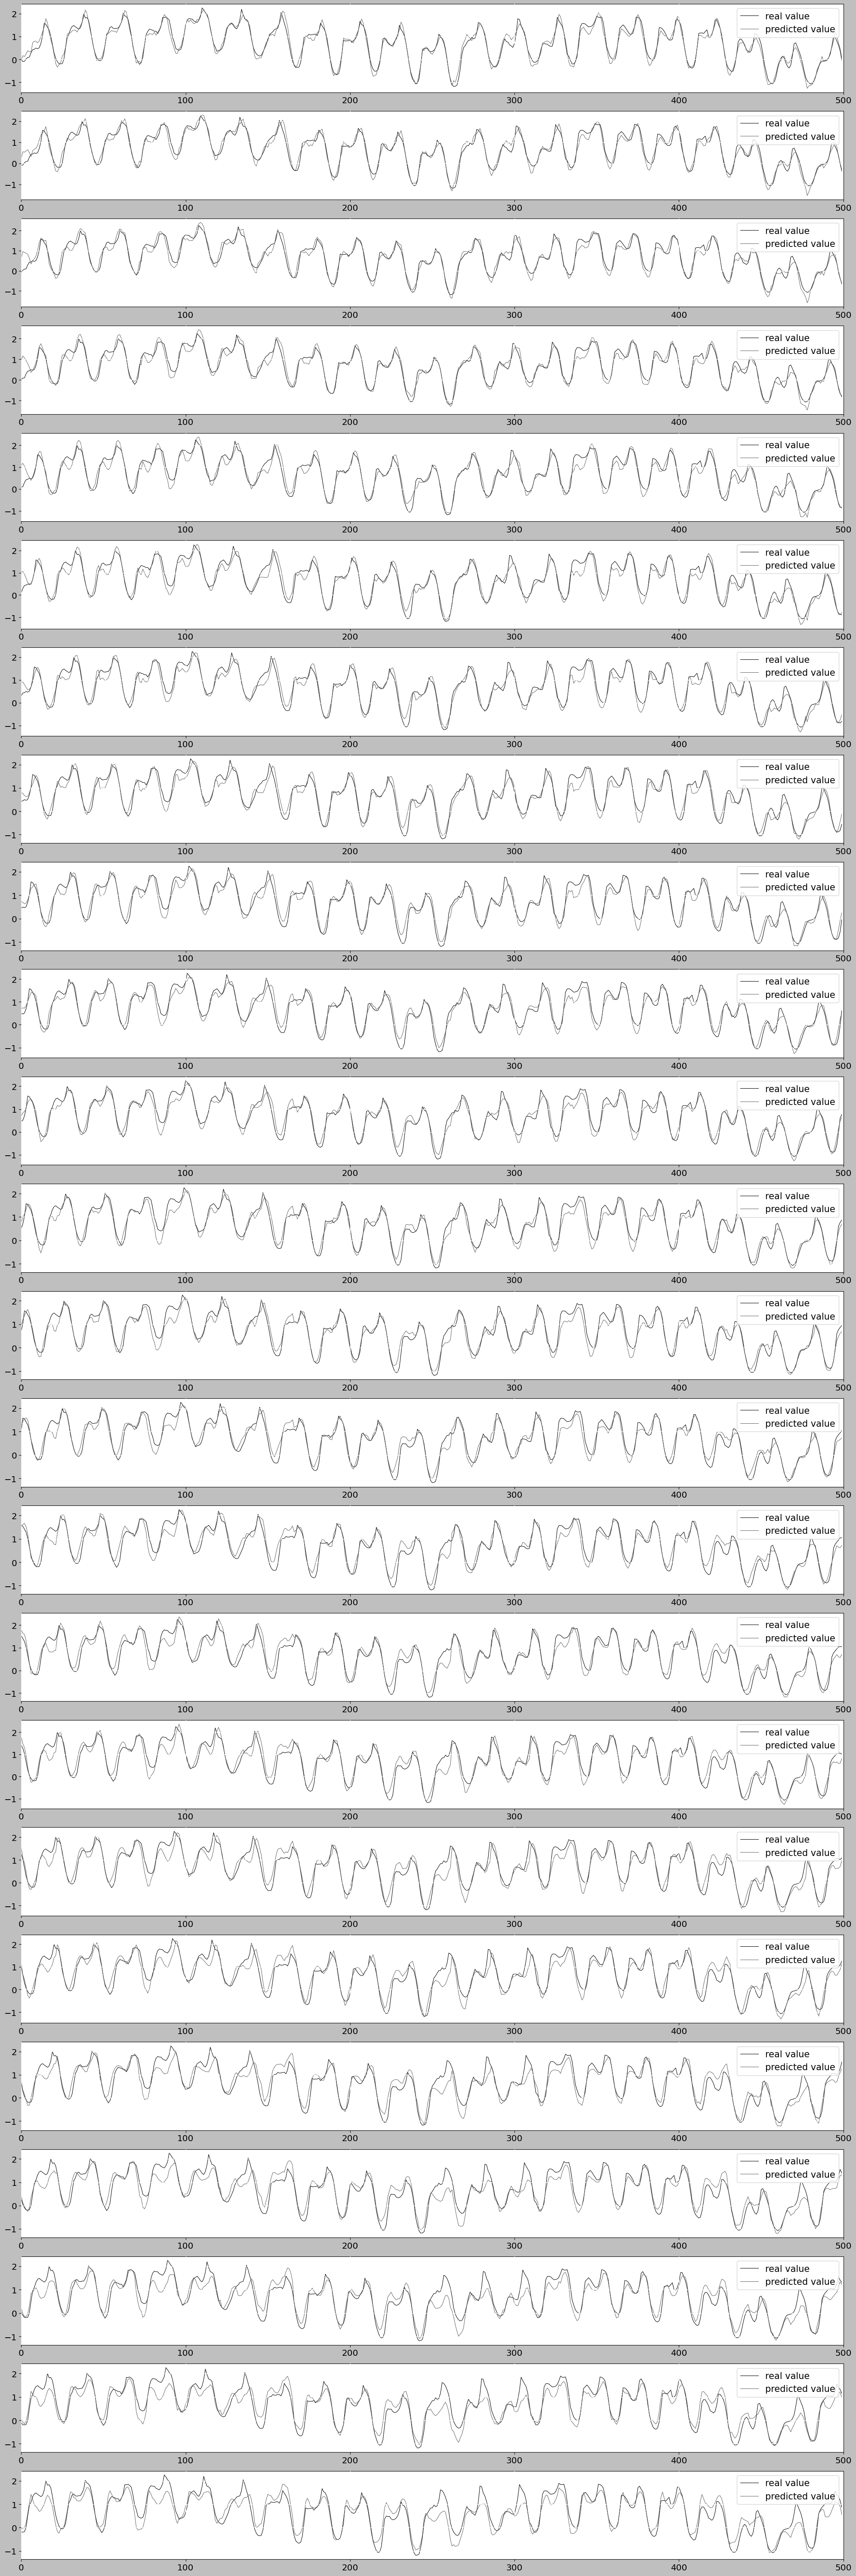

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(24, 1, figsize=(20, 60))  # Create a figure with 12 subplots
y_predict = model.predict(x_test)
y_predict_array = np.array(y_predict)
# y_predict_array = y_predict_array.reshape(len(y_test), 12)
for i in range(24):
    y_test1 = y_test[:, i]
    y_pre = y_predict_array[:, i]
    # print(y_test1.shape, y_pre.shape)
    draw = pd.concat([pd.DataFrame(y_test[:500, i]), pd.DataFrame(y_pre)], axis=1)
    draw.iloc[:, 0].plot(ax=axs[i])  # Plot y_test value in the corresponding subplot
    draw.iloc[:, 1].plot(ax=axs[i])  # Plot predicted value in the corresponding subplot
    axs[i].legend(('real value', 'predicted value'), loc='upper right', fontsize='15')
    # axs[i].title(f"Test Data vs Predicted after {i+1} hours", fontsize='20')
    axs[i].set_xlim(0, len(y_test1[:]))  # Set the x-axis limits for each subplot

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


In [ ]:
result=pd.read_csv('/content/Results.csv')
result

,Unnamed: 0,TrialNumber,Parameters,learning_rate,MAPE
0,0,1,8-1000-0.5,NaN,3.586922
1,0,2,8-1000-0.1,NaN,1.118657
2,0,3,8-1000-0.05,NaN,1.115934
3,0,4,8-1000-0.01,NaN,3.209343
4,0,5,8-1000-0.005,NaN,2.129815
5,0,6,8-1000-0.001,NaN,1.866840
6,0,7,8-1000-0.0005,NaN,2.289208
7,0,8,8-1000-0.0001,NaN,1.828989
8,0,9,12-1000-0.5,NaN,1.736627
9,0,10,12-1000-0.1,NaN,1.780722


In [ ]:
result[['Batch Size', 'Epochs', 'Learning Rate']]=result['Parameters'].str.split('-',expand=True)
evaluate_result=result[['Batch Size','Epochs','Learning Rate','MAPE']]
evaluate_result=evaluate_result.dropna()
evaluate_result

,Batch Size,Epochs,Learning Rate,MAPE
0,8,1000,0.5,3.586922
1,8,1000,0.1,1.118657
2,8,1000,0.05,1.115934
3,8,1000,0.01,3.209343
4,8,1000,0.005,2.129815
5,8,1000,0.001,1.866840
6,8,1000,0.0005,2.289208
7,8,1000,0.0001,1.828989
8,12,1000,0.5,1.736627
9,12,1000,0.1,1.780722


In [ ]:
evaluate_result.describe()

,MAPE
count,32.000000
mean,1.841475
std,0.635420
min,1.088717
25%,1.492496
50%,1.750812
75%,1.854853
max,3.895834


In [ ]:
print(evaluate_result.min())
print()
print(evaluate_result.max())

Batch Size             12
Epochs               1000
Learning Rate      0.0001
MAPE             1.088717
dtype: object

Batch Size              8
Epochs               1000
Learning Rate         0.5
MAPE             3.895834
dtype: object


In [ ]:
print(evaluate_result[evaluate_result.MAPE == evaluate_result.MAPE.min()])
print()
print(evaluate_result[evaluate_result.MAPE == evaluate_result.MAPE.max()])

   Batch Size Epochs Learning Rate      MAPE
21         20   1000         0.001  1.088717

   Batch Size Epochs Learning Rate      MAPE
24         24   1000           0.5  3.895834


# PREDICTION FOR WHOLE YEAR

In [ ]:
pd.set_option('display.max_columns', 100)
dfpredict_data = df_files.loc['2020':, :].copy(deep=True)
predict_data = dfpredict_data[['Dewpoint Temp', 'Relative Humidity','Wind Speed', 'Visibility', 'Pressure','Hour_of_Day','Month','Day_Of_Week', 'Day_of_Year', 'Week_Of_Year','Quarter','Wind_Chill','Stat_Hol','Temperature']]
predict_data

,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,hour_of_day,month,day_of_week,day_of_year,week_of_year,quarter,daily_peak,hourly_demand
2010-01-01 00:00:00,0.8,0.1,95.0,7.0,12.9,99.17,0.0,1.0,4.0,1.0,53.0,1.0,17915.0,14403.0
2010-01-01 01:00:00,0.6,0.0,96.0,9.0,9.7,99.13,1.0,1.0,4.0,1.0,53.0,1.0,17915.0,13814.0
2010-01-01 02:00:00,0.7,0.0,95.0,13.0,9.7,99.13,2.0,1.0,4.0,1.0,53.0,1.0,17915.0,13366.0
2010-01-01 03:00:00,0.5,-0.5,93.0,9.0,16.1,99.18,3.0,1.0,4.0,1.0,53.0,1.0,17915.0,13120.0
2010-01-01 04:00:00,0.5,-0.6,92.0,9.0,16.1,99.17,4.0,1.0,4.0,1.0,53.0,1.0,17915.0,13075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 19:00:00,7.0,5.7,91.0,7.0,24.1,99.30,19.0,12.0,4.0,365.0,52.0,4.0,17608.0,16511.0
2010-12-31 20:00:00,6.9,6.2,95.0,7.0,16.1,99.30,20.0,12.0,4.0,365.0,52.0,4.0,17608.0,15758.0
2010-12-31 21:00:00,7.7,7.0,95.0,6.0,16.1,99.30,21.0,12.0,4.0,365.0,52.0,4.0,17608.0,15116.0
2010-12-31 22:00:00,8.1,7.4,95.0,6.0,19.3,99.27,22.0,12.0,4.0,365.0,52.0,4.0,17608.0,14529.0


In [ ]:
scaler=StandardScaler()
predict=scaler.fit_transform(np.array(predict_data))
predict

array([[-0.82381055, -0.3973762 ,  1.41915897, ..., -1.35174944,
        -0.33039956, -0.70281945],
       [-0.84227601, -0.40702618,  1.47816626, ..., -1.35174944,
        -0.33039956, -0.92911582],
       [-0.83304328, -0.40702618,  1.41915897, ..., -1.35174944,
        -0.33039956, -1.10123937],
       ...,
       [-0.18675203,  0.26847195,  1.41915897, ...,  1.33457658,
        -0.46890501, -0.42888175],
       [-0.1498211 ,  0.30707184,  1.41915897, ...,  1.33457658,
        -0.46890501, -0.65440971],
       [-0.14058837,  0.33602176,  1.53717355, ...,  1.33457658,
        -0.46890501, -0.92527377]])

In [ ]:
xp = np.array([[predict[i-2,:], predict[i-1,:], predict[i,:]] for i in range(2, len(predict)-24)])
print(f'xp.shape: {xp.shape}')
yp = np.array([np.stack([predict[i+j+1,-1] for j in range(0, 24)]) for i in range(2, len(predict)-24)])
print(f'yp.shape: {yp.shape}')

xp.shape: (8734, 3, 14)
yp.shape: (8734, 24)


In [ ]:
xp.shape
y_prediction = model.predict(xp)
y_prediction_array = np.array(y_prediction)

273/273 [==============================] - 3s 10ms/step


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(yp, y_prediction)
print("Mean Absolute Percentage Error (MAPE):", mape)
print(yp.shape)
print(y_prediction.shape)
mape_values = []
for actual, predicted in zip(yp, y_prediction):
    mape_values.append(mean_absolute_percentage_error([actual], [predicted]))

worst_mape = np.max(mape_values)
best_mape = np.min(mape_values)

print("Worst MAPE:", worst_mape)
print("Best MAPE:", best_mape)


Mean Absolute Percentage Error (MAPE): 2.071805965538113
(8734, 24)
(8734, 24)
Worst MAPE: 154.24535948270085
Best MAPE: 0.08995322141868212


##VISUALISATION

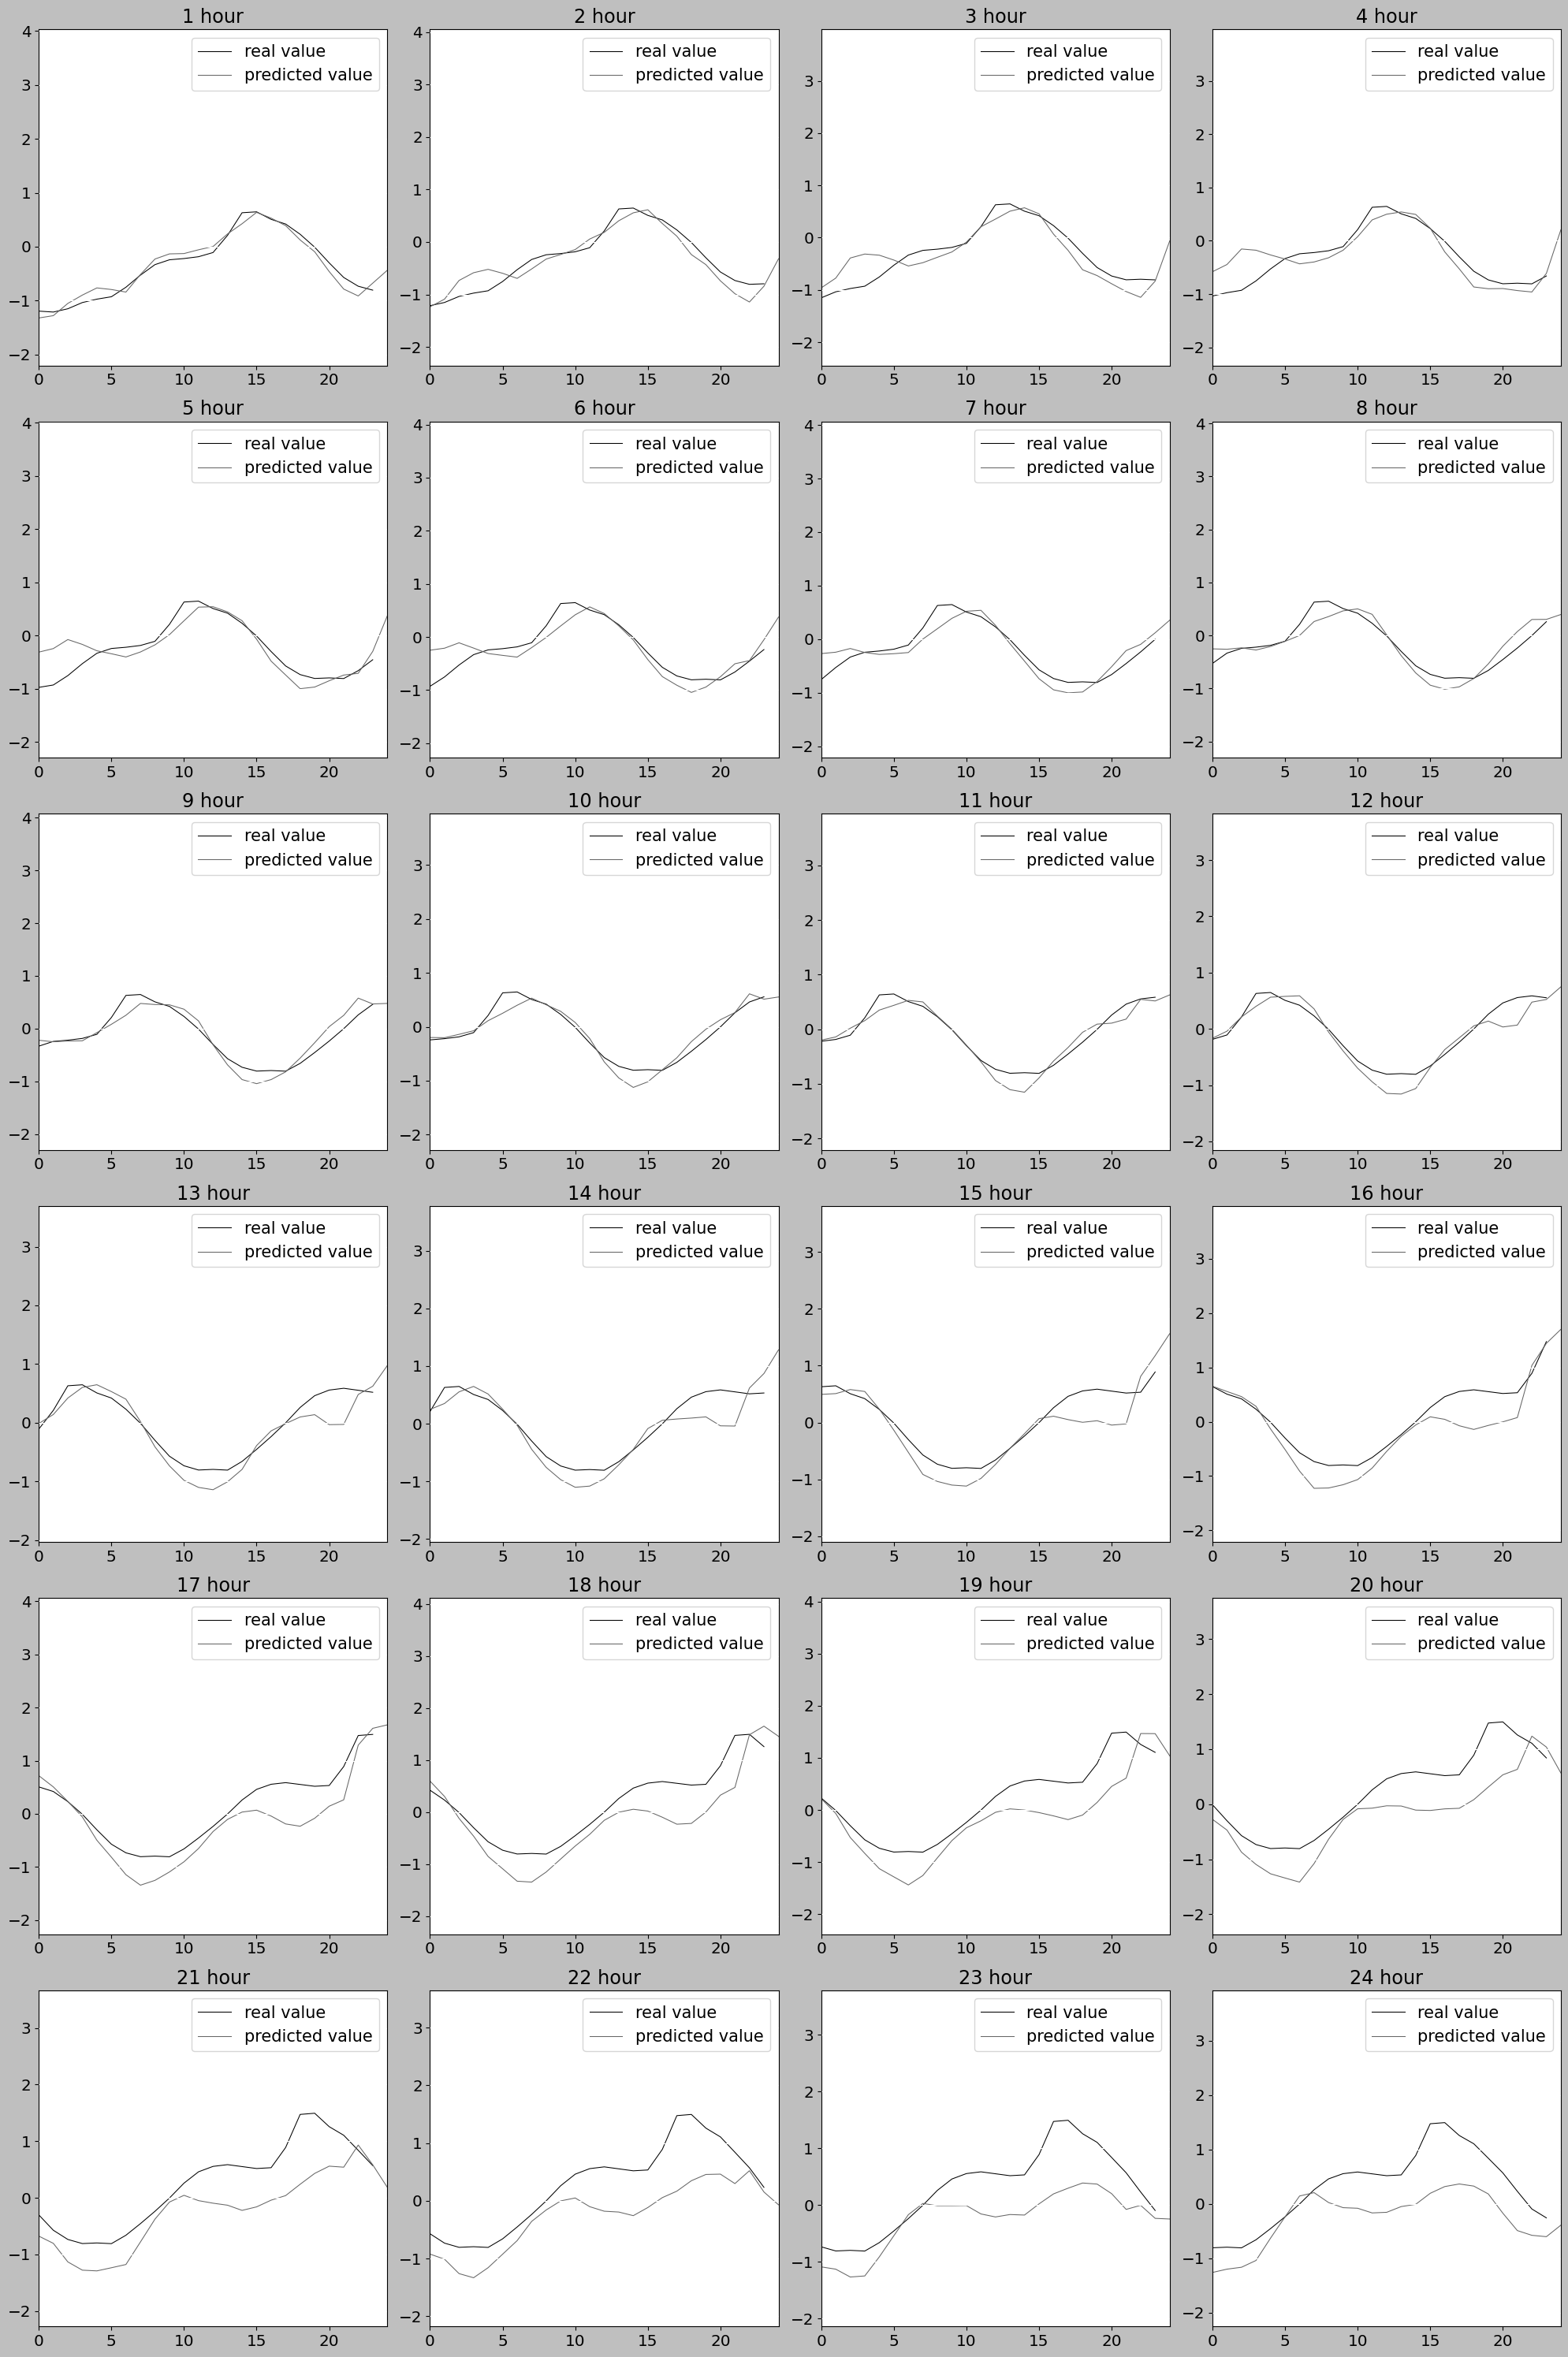

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(6, 4, figsize=(20, 30))  # Create a figure with 6 rows and 4 columns of subplots


for i in range(24):
    row = i // 4  # Calculate the row index for the subplot
    col = i % 4  # Calculate the column index for the subplot

    y_prede = y_prediction_array[:, i]
    draw = pd.concat([pd.DataFrame(yp[:24, i]), pd.DataFrame(y_prede)], axis=1)

    axs[row, col].plot(draw.iloc[:, 0])  # Plot y_test value in the corresponding subplot
    axs[row, col].plot(draw.iloc[:, 1])  # Plot predicted value in the corresponding subplot
    axs[row, col].legend(('real value', 'predicted value'), loc='upper right', fontsize='15')
    axs[row, col].set_xlim(0, len(yp[:24]))  # Set the x-axis limits for each subplot
    axs[row, col].set_title(f"{i+1} hour")  # Add a title to the subplot indicating the hour

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


In [ ]:
df_predict_aggregate = pd.DataFrame(columns=['prediction_agg', 'actual'])
def aggregate_plot(y_actual, y_pred):
  y_mean_pred = []
  for j in range(23, -1, -1):
    sum=0
    for i in range(0, 24):
      if j-i>=0:
        sum += y_pred[i][j-i]
    y_mean_pred.append(sum/(j+1))
  y_mean_pred = list(reversed(y_mean_pred))
  df_predict_aggregate['prediction_agg'] = y_mean_pred
  df_predict_aggregate['actual'] = y_actual

  mape = mean_absolute_percentage_error(yp, y_prediction)
  print(mape)
  plt.plot(y_actual, marker='*', color='blue')
  plt.plot(y_mean_pred, marker='+', color ='red')
  plt.legend(('real value', 'predicted value'), loc='upper right', fontsize='15')
  plt.show()

In [ ]:
df_predict_aggregate

,prediction_agg,actual


2.071805965538113


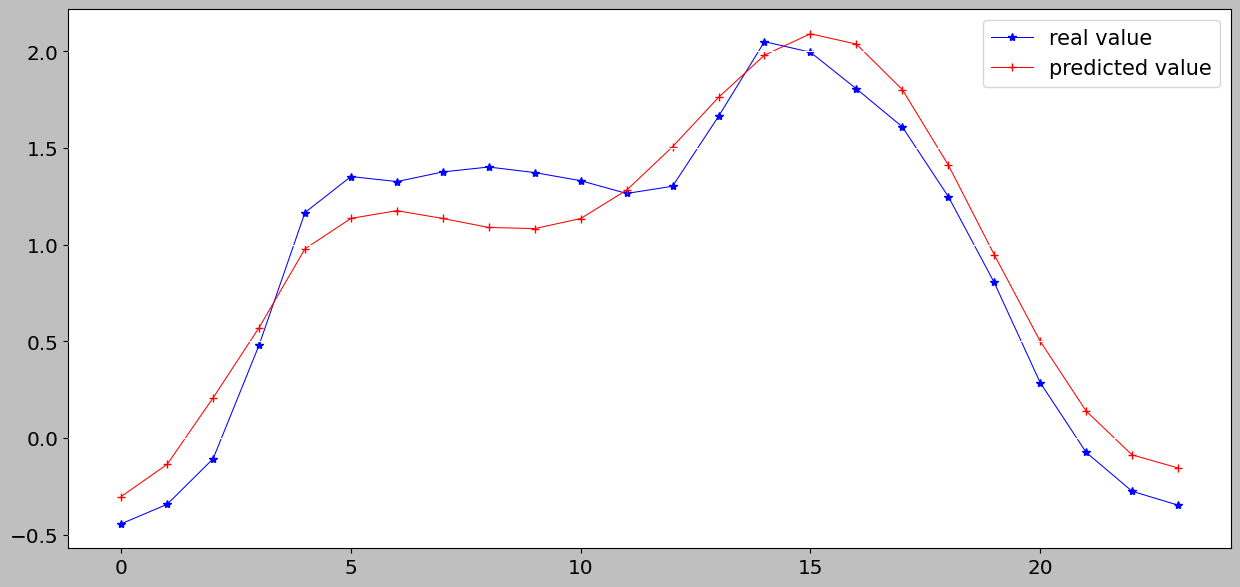

In [ ]:
aggregate_plot(yp[240], y_prediction[240:264])